In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

file_list = os.listdir("./result")

jensonshanon_result_file_list = []

for file in file_list:
    if 'kld_mean_result' in file:
        jensonshanon_result_file_list.append(file)

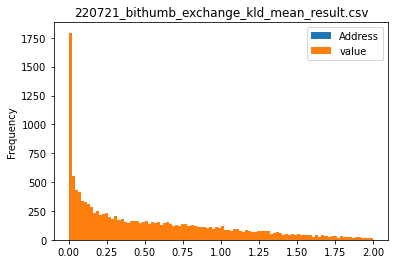

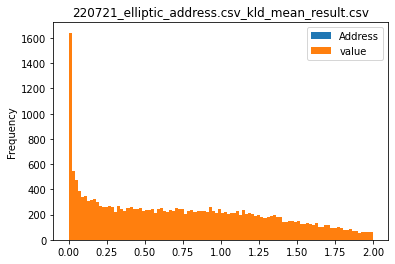

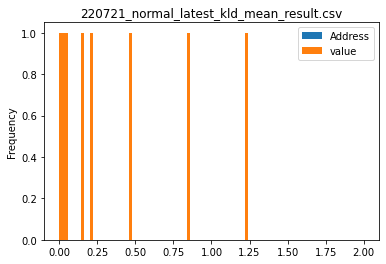

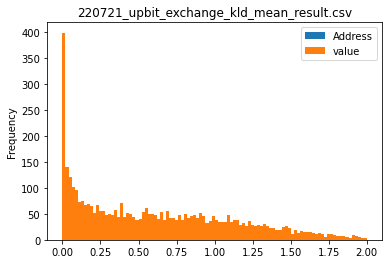

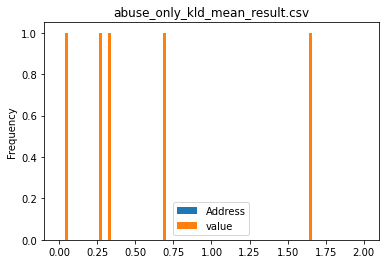

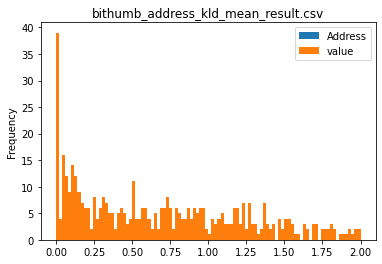

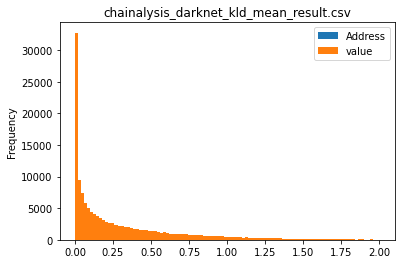

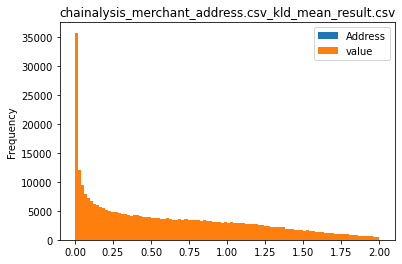

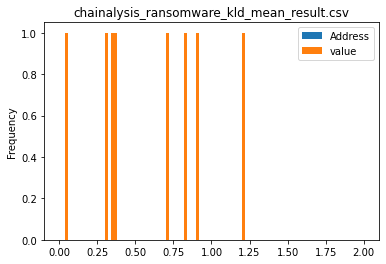

In [2]:

for file in jensonshanon_result_file_list:
    jenson_data = pd.read_csv(f"./result/{file}", header=None)
    jenson_data.columns = ['Address' , 'value']
    histogram = jenson_data.plot.hist(range = [0, 2], bins = 100)
    plt.title(file)
    plt.show()

In [6]:
file_list = os.listdir('./')
files = []
for file in file_list:
    if 'mean_std_result' in file:
        files.append(file)
print(files)

['abuse_blackmail_mean_std_result.csv', 'abuse_darknetmarket_mean_std_result.csv', 'abuse_mixing_mean_std_result.csv', 'abuse_other_mean_std_result.csv', 'abuse_ransomware_mean_std_result.csv', 'abuse_sextortion_mean_std_result.csv', 'bithumb_exchange_mean_std_result.csv', 'chainalysis_darknet_mean_std_result.csv']


In [26]:
from sklearn.metrics.pairwise import cosine_similarity
from seaborn import heatmap
import math

file_list = os.listdir('./')
files = []
for file in file_list:
    if 'mean_std_result' in file:
        files.append(file)



for file in files:

    abuse_df = pd.read_csv(file, header=None)
    bithumb_df = pd.read_csv('bithumb_exchange_mean_std_result.csv', header=None)

    target_df = pd.concat([abuse_df, bithumb_df])
    target_df.columns = ['address', 'mean', 'std']
    abuse_df.columns = ['address', 'mean', 'std']
    bithumb_df.columns = ['address', 'mean', 'std']


    abuse_df = pd.concat([abuse_df['mean'], abuse_df['std']], axis=1)
    bithumb_df = pd.concat([bithumb_df['mean'], bithumb_df['std']], axis=1)

    target_df = pd.concat([target_df['mean'], target_df['std']], axis=1)
    # normalized_df = (target_df-target_df.min()) / (target_df.max() - target_df.min())
    result = cosine_similarity(abuse_df, bithumb_df)

    new_result = np.where(result < 0.9, 0, result)
    new_result = np.where(result >= 0.9, 1, new_result)
    # new_result = np.where(result == 1, 0, result)
              
    map_count = new_result.shape[0] * new_result.shape[0]
    _sum = np.sum(new_result)
    print(_sum)
    total_result = (math.sqrt(_sum)) / map_count * 100
    print(total_result)


16070267.0
0.6521979371645338
58392412.0
0.09161863765839254
20562543.0
0.46080275552558214
116634547.0
0.030423740332899928
62956866.0
0.08042400147889735
33216864.0
0.20940475647407927
584565343.0
0.002580248279945539


MemoryError: Unable to allocate 349. GiB for an array with shape (1530283, 30611) and data type float64